# **Solucionador a Ejercicios de monopolios con discriminación de tercer grado.**

Empezamos importando las librerías necesarias


In [1]:
# Importamos las librerías necesarias
from sympy import *
import string
import copy
from IPython.display import display, Math, Markdown
import matplotlib.pyplot as plt
import numpy as np

## Ejercicio de Ejemplo
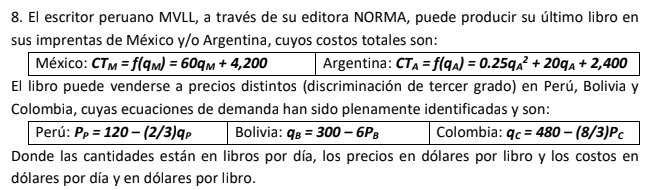

1. Empezamos determinando la cantidad de demandas *(segmentos)* y costos *(plantas)*.


---


**Siguiendo con el ejercicio:**

Cantidad de demandas: $3$<br>
Cantidad de Costos: $2$


In [2]:
######################################################################################
# DEFINIMOS LA CANTIDAD DE DEMANDAS Y COSTOS
# Aquí, pides al usuario el número de segmentos e inicializas símbolos para esas demandas.
cantidad_de_demandas = 3 # @param {type:"slider", min:0, max:3, step:1}
demandas_q_p_key = [symbols(f'q_{i} p_{i} Img_{i}') for i in range(1, cantidad_de_demandas+1)]

# Aquí, pides al usuario el número de costos e inicializas símbolos para esas costos.
cantidad_de_costos = 2 # @param {type:"slider", min:0, max:3, step:1}
costos_ct_q_key = [symbols(f'CT_{i} q_{i} Cmg_{i}') for i in string.ascii_lowercase[:cantidad_de_costos]]

2. Según tu cantidad de demandas y costos, se te pedirá la misma cantidad de ecuaciones.


---


**Cosas a tener en cuenta:** <br>
Las ecuaciones de demanda deben estar expresadas en $q_(p)$.<br>
Debes escribir con operadores que python entienda (así como en el excel).<br>
Escribe en variables $p$ y $q$, los subíndices se crearan solos.

---


**Siguiendo con el ejercicio:**<br>
> *Las ecuaciones se deben escribir como esta escrito después de la última flecha*

Demandas:
- *Perú* : &nbsp; &nbsp; &nbsp; $q_1$ = $180 - 3/2 p_1$ ⟶ &nbsp; q_1 = 180 - 3/2 * p
- *Bolivia* : &nbsp; &nbsp; $q_2$ = $300 - 6 p_2$ &nbsp; &nbsp; ⟶ &nbsp; q_2 = 300 - 6 * p
- *Colombia* : $q_3$ = $480 - 8/3 p_3$ ⟶ &nbsp; q_3 = 480 - 8/3 * p

Costos:
- *México* : &nbsp; &nbsp; $CT_a$ = $60q_a + 4200$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; ⟶ &nbsp; CT_a = 60 * q + 4200
- *Argentina* : $CT_b$ = $0.25q^2_b + 20q_b + 2400$ &nbsp; ⟶ &nbsp; CT_b = 0.25 * q ^ 2 + 20 *q + 2400

In [67]:
######################################################################################
# Solicitamos al usuario las funciones de demanda y costos
demandas_q_p = {q:sympify(input(f'{q} = ').replace('p', str(p))) for q, p, Img in demandas_q_p_key}
costos_ct_q = {ct:sympify(input(f'{ct} = ').replace('q', str(q))) for ct, q, Cmg in costos_ct_q_key}

q_1 =  180 - 3/2 * p
q_2 = 300 - 6 * p
q_3 = 480 - 8/3 * p
CT_a = 60 * q + 4200
CT_b = 0.25 * q ^ 2 + 20 *q + 2400


## **Desarrollo del ejercicio**

### **Monopolio: ($Img$ $=$ $Cmg$)**


> Aquí la empresa es el único competidor en el mercado y tiene poder de decision en los precios de sus productos.



In [70]:
######################################################################################
# DESARROLLAMOS LAS DEMANDAS(SEGMENTOS):
# Despejamos la variable P de la función de demanda.
demandas_p_q = {p: solve(q - demandas_q_p[q], p)[0] for q, p, Img in demandas_q_p_key}
# Ahora transformamos la función de demanda_p_q a una función de ingreso marginal.
demandas_img_q = {Img: diff(demandas_p_q[p]*q, q) for q, p, Img in demandas_q_p_key}
# Ahora, despejamos la variable q de la función de ingreso marginal.
demandas_q_img = {q: solve(Img - demandas_img_q[Img], q)[0] for q, p, Img in demandas_q_p_key}


funtions_Img_ecuation_q = [(Img, ecuacion.subs(q, 0), q) for q, p , Img in demandas_q_p_key for img, ecuacion in demandas_img_q.items() if Img == img]
# Ahora, ordeno los valores numéricos (index = 1) de la funcion_escogida de mayor a menor.
funciones_ecuation_constante_ordenadas= sorted(funtions_Img_ecuation_q, key=lambda x: x[1], reverse=True)

img_anterior = 0
ingreso_marginal_total = []
Img, Q = symbols('Img Q')

for img, constante, q in funciones_ecuation_constante_ordenadas:
    # LLamo a la función demandas_q_img y le cambio el subíndice de Img_x -> Img y q_x -> Q_d.
    demandas_Qd_img = demandas_q_img[q].subs(img, Img) + img_anterior
    demandas_img_Qd = solve(Q - demandas_Qd_img, Img)[0]
    # Agrego a la lista la función de Img total (en tramos)
    ingreso_marginal_total.append(simplify(demandas_img_Qd))
    # Aumento el valor de x para que la siguiente función empiece en el valor de la anterior.
    img_anterior = demandas_Qd_img

# Hallo los valores correspondientes de Q_d para que se cumpla el ingreso marginal total.
# Calcular los puntos de intersección de las ecuaciones
Img_puntos_interseccion = [0] + [float(format(solve(ingreso_marginal_total[i] - ingreso_marginal_total[i+1], Q)[0].evalf(), ".2f")) for i in range(len(ingreso_marginal_total)-1)] + [solve(ingreso_marginal_total[-1], Q)[0]]

# Crear la función por tramos
funcion_img_q_por_tramos = Piecewise(
    *[(ecuacion, (Q >= Img_puntos_interseccion[i]) & (Q < Img_puntos_interseccion[i+1])) for i, ecuacion in enumerate(ingreso_marginal_total)]
)

# Imprimo el proceso del ejercicio (parte Demanda) en formato latex
display(Markdown(f"### **DEMANDA:**"))
proceso_obtencion_q_img = [f'Segmento_{n}: {latex(q_p[0])} = {latex(q_p[1])} \\rightarrow  {latex(p_q[0])} = {latex(p_q[1])}  \\rightarrow  {latex(img_q[0])} = {latex(img_q[1])}  \\rightarrow  {latex(q_img[0])} = {latex(q_img[1])}' for n, q_p, p_q, img_q, q_img in zip(range(1, len(demandas_q_p) + 1), demandas_q_p.items(), demandas_p_q.items(), demandas_img_q.items(), demandas_q_img.items())]
for ecuacion in proceso_obtencion_q_img:
    display(Math(ecuacion))

display(Markdown(f"$Img^T_Q$ ${latex(funcion_img_q_por_tramos)}$"))

print('------------------------------------------------------------------------------------------------------------------')
######################################################################################
# DESARROLLAMOS LOS COSTOS(PLANTAS):
# Variables
Cmg, Q = symbols('Cmg Q')

# Transformamos la funciones de costos a una funciones de costo marginal.
costos_cmg_q = {cmg: diff(costos_ct_q[ct], q) for ct, q, cmg in costos_ct_q_key}

# Identificar las constantes en costos_cmg_q
q_ct = [i[1] for i in costos_ct_q_key]
cmg_constante = [(Cmg, ecuacion) for Cmg, ecuacion, q in zip(costos_cmg_q.keys(), costos_cmg_q.values(), q_ct) if diff(ecuacion, q) == 0]

# Despejamos la variable q de la función de costo marginal.
if len(cmg_constante) > 0:
    costos_q_cmg = {q: solve(Cmg - costos_cmg_q[Cmg], q)[0] for ct, q, Cmg in costos_ct_q_key if Cmg not in cmg_constante[0]}
    funciones_costos = [(Cmg, ecuacion.subs(q,0), q) for ct, q, Cmg in costos_ct_q_key for cmg, ecuacion in costos_cmg_q.items() if Cmg == cmg and Cmg not in cmg_constante[0]]
    for i in funciones_costos:
        if i[1] >= cmg_constante[0][1]:
            funciones_costos.remove(i)
else:
    costos_q_cmg = {q: solve(Cmg - costos_cmg_q[Cmg], q)[0] for ct, q, Cmg in costos_ct_q_key}
    funciones_costos = [(Cmg, ecuacion.subs(q,0), q) for ct, q, Cmg in costos_ct_q_key for cmg, ecuacion in costos_cmg_q.items() if Cmg == cmg]


# Ordenamos los valores numéricos (index = 1) de la función_escogida de mayor a menor.
funciones_costos_ordenadas = sorted(funciones_costos, key=lambda x: x[1])

q_anterior = 0
costo_total = []

for cmg, constante, q in funciones_costos_ordenadas:
    # Llamamos a la función costos_q_cmg y le cambiamos el subíndice de Cmg_x -> Cmg y q_x -> Q_c.
    costos_Qc_Cmg = costos_q_cmg[q].subs(cmg, Cmg) + q_anterior
    costos_Cmg_Qc = solve(Q - costos_Qc_Cmg, Cmg)[0]
    # Agregamos a la lista la función de costo total (en tramos)
    costo_total.append(nsimplify(costos_Cmg_Qc))
    # Aumentamos el valor de q para que la siguiente función empiece en el valor de la anterior.
    q_anterior = costos_Qc_Cmg

# arreglamos costos_q_cmg para cuando costos_cmg_q es igual a una constante.
copy_list_costos_q_cmg = list(costos_q_cmg.items())
if len(cmg_constante) > 0:
    costo_total += [cmg_constante[0][1]] # agrego la cmg_constante a la funcion de cmg_total
    posicion_cmg_constante_in_q_cmg = [posicion for posicion, cmg_x in enumerate(costos_ct_q_key) if cmg_x[2] == cmg_constante[0][0]][0]
    y = 0
    for i in q_ct:
        y += i
    copy_list_costos_q_cmg.insert(posicion_cmg_constante_in_q_cmg, (Q, y))
else:
    None

# Calcular los puntos de intersección de las ecuaciones
costos_puntos_interseccion = [0] + [solve(costo_total[i] - costo_total[i+1], Q)[0] for i in range(len(costo_total)-1)]

# Crear la función por tramos
funcion_costos_por_tramos = Piecewise(
    *[(ecuacion, (Q >= costos_puntos_interseccion[i]) & (Q < costos_puntos_interseccion[i+1])) for i, ecuacion in enumerate(costo_total[:-1])],
    (costo_total[-1], Q >= costos_puntos_interseccion[-1])
)

# Imprimo el proceso del ejercicio (parte Costos) en formato latex
display(Markdown(f"### **COSTOS:**"))
proceso_obtencion_q_cmg = [f'Planta_{n}: {latex(ct_q[0])} = {latex(ct_q[1])} \\rightarrow  {latex(cmg_q[0])} = {latex(cmg_q[1])}  \\rightarrow  {latex(q_cmg[0])} = {latex(q_cmg[1])}' for n, ct_q, cmg_q, q_cmg in zip(string.ascii_lowercase[:cantidad_de_costos], costos_ct_q.items(), costos_cmg_q.items(), copy_list_costos_q_cmg)]
for ecuacion in proceso_obtencion_q_cmg:
    display(Math(ecuacion))

display(Markdown(f"$Cmg^T_Q$ ${latex(funcion_costos_por_tramos)}$"))

print('------------------------------------------------------------------------------------------------------------------')
######################################################################################
# IGUALDAD DE INGRESO MARGINAL TOTAL Y COSTO MARGINAL TOTAL
# COSTOS: expresiones y condiciones
Cmg_expr_cond = [(expr, cond) for expr, cond in funcion_costos_por_tramos.args]

# DEMANDAS: expresiones y condiciones
Img_expr_cond = [(expr, cond) for expr, cond in funcion_img_q_por_tramos.args]

# Encontrar valores de las expresiones que satisfacen las condiciones
img_equal_cmg_and_Qtotal = [(c_expr.subs(Q, solve(c_expr - d_expr, Q)[0]), solve(c_expr - d_expr, Q)[0], f'{d_expr} = {c_expr}') for c_expr, c_cond in Cmg_expr_cond for d_expr, d_cond in Img_expr_cond if c_cond.as_set().contains(solve(c_expr - d_expr, Q)[0]) == True and d_cond.as_set().contains(solve(c_expr - d_expr, Q)[0]) == True][0]
display(Markdown(f'**-----------IMG = CMG-----------** <br> ${latex(img_equal_cmg_and_Qtotal[2])}$ <br> **------------------------------------**'))
display(Math(f'Q = {latex(img_equal_cmg_and_Qtotal[1])}'))
display(Math(f'CMG_T = IMG_T = {latex(img_equal_cmg_and_Qtotal[0])}'))


print('------------------------------------------------------------------------------------------------------------------')
######################################################################################
# INGRESO TOTAL:
valores_q_demanda_sin_filtro = [(q, ecuacion.subs(Img[2], img_equal_cmg_and_Qtotal[0])) for q, ecuacion, Img in zip(demandas_q_img.keys(), demandas_q_img.values(), demandas_q_p_key)]
# Los valores de q que son negativos, pasan a valer 0.
valores_q_demanda = [(q[0], 0) if q[1] < 0 else q for q in valores_q_demanda_sin_filtro]
valores_p_demanda = [(p, ecuacion.subs(valor_q[0], valor_q[1])) for p, ecuacion, valor_q in zip(demandas_p_q.keys(), demandas_p_q.values(), valores_q_demanda)]
ingreso_semi_total = [(f'IT_{n}',round(q[1]*p[1], 2)) for n, q, p in zip(range(1, len(demandas_q_p)+1),valores_q_demanda, valores_p_demanda)]
ingreso_total = sum([simplify(i[1]) for i in ingreso_semi_total])

# Imprimo el proceso del ejercicio (parte Ingreso Total) en formato latex
display(Markdown(f"### **INGRESO TOTAL :**"))
proceso_obtencion_IT = [f'Segmento_{n}: {latex(q[0])} = {latex(q[1])} \\rightarrow  {latex(p[0])} = {latex(p[1])} \\rightarrow  {latex(IT[0])} = {latex(IT[1])}' for n, q, p, IT in zip(range(1, len(demandas_q_p)+1),valores_q_demanda, valores_p_demanda, ingreso_semi_total)]
for ecuacion in proceso_obtencion_IT:
    display(Math(ecuacion))

display(Markdown(f'##### **INGRESO TOTAL** = ${latex(ingreso_total)}$'))


print('------------------------------------------------------------------------------------------------------------------')
######################################################################################
# COSTO TOTAL:
# Enlisto Cmg que no son constantes.
Cmg_no_constantes = [cmg[2] for cmg in costos_ct_q_key if cmg[2] != cmg_constante[0][0]]
# Obtengo la cantidad exacta producida en una planta.
valores_q_costos_sin_filtro = [(q, ecuacion.subs(Cmg, img_equal_cmg_and_Qtotal[0])) for q, ecuacion, Cmg in zip(costos_q_cmg.keys(), costos_q_cmg.values(), Cmg_no_constantes)]
# Los valores de q que son negativos, automaticamente pasan a ser 0.
valores_q_costos = [(q[0], 0) if q[1] < 0 else q for q in valores_q_costos_sin_filtro]
if len(cmg_constante) > 0:
    q_cmg_constante = [q[1] for q in costos_ct_q_key if cmg_constante[0][0] == q[2]]
    sum_q_valores_costos = sum([valor_q[1] for valor_q in valores_q_costos])
    valor_q_cmg_constante = (q_cmg_constante[0], img_equal_cmg_and_Qtotal[1] - sum_q_valores_costos)
    valores_q_costos.insert(posicion_cmg_constante_in_q_cmg,valor_q_cmg_constante)
costo_semi_total = [(f'CT_{n}', ct_ecuacion.subs(q[0], q[1])) for n, q, ct_ecuacion in zip(string.ascii_lowercase[:cantidad_de_costos],valores_q_costos, costos_ct_q.values())]
costo_total = sum([i[1] for i in costo_semi_total])

# Imprimo el proceso del ejercicio (parte Costo Total) en formato latex
display(Markdown(f"### **COSTO TOTAL :**"))
proceso_obtencion_CT = [f'Planta_{n}: {latex(q[0])} = {latex(q[1])} \\rightarrow  {latex(ct[0])} = {latex(ct[1])}' for n, q, ct in zip(string.ascii_lowercase[:cantidad_de_costos], valores_q_costos, costo_semi_total)]
for ecuacion in proceso_obtencion_CT:
    display(Math(ecuacion))

display(Markdown(f'##### **COSTO TOTAL** = ${latex(costo_total)}$'))


print('------------------------------------------------------------------------------------------------------------------')
######################################################################################
# BENEFICIO TOTAL:
beneficio_total = ingreso_total - costo_total
display(Markdown(f'### **BENEFICIO TOTAL** = ${latex(beneficio_total)}$'))

### **DEMANDA:**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

$Img^T_Q$ $\begin{cases} 180 - \frac{3 Q}{4} & \text{for}\: Q \geq 0 \wedge Q < 80.0 \\\frac{792}{5} - \frac{12 Q}{25} & \text{for}\: Q \geq 80.0 \wedge Q < 225.83 \\\frac{5760}{61} - \frac{12 Q}{61} & \text{for}\: Q \geq 225.83 \wedge Q < 480 \end{cases}$

------------------------------------------------------------------------------------------------------------------


### **COSTOS:**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

$Cmg^T_Q$ $\begin{cases} \frac{Q}{2} + 20 & \text{for}\: Q \geq 0 \wedge Q < 80 \\60 & \text{for}\: Q \geq 80 \end{cases}$

------------------------------------------------------------------------------------------------------------------


**-----------IMG = CMG-----------** <br> $\mathtt{\text{792/5 - 12*Q/25 = 60}}$ <br> **------------------------------------**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------------------------------------------------------------------


### **INGRESO TOTAL :**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

##### **INGRESO TOTAL** = $23250$

------------------------------------------------------------------------------------------------------------------


### **COSTO TOTAL :**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

##### **COSTO TOTAL** = $17300.0$

------------------------------------------------------------------------------------------------------------------


### **BENEFICIO TOTAL** = $5950.0$

### **Competencia perfecta: ($P = Cmg$)**



> Aquí la empresa se comporta como competidor perfecto, y atiende al precio que el mercado lo indica.




In [77]:

funciones_demandas = [(p, nsimplify(ecuacion.subs(q, 0)), q) for q, p , Img in demandas_q_p_key for p_q, ecuacion in demandas_p_q.items() if p == p_q]
# Ahora, ordeno los valores numéricos (index = 1) de la funcion_escogida de mayor a menor.
funciones_ordenadas= sorted(funciones_demandas, key=lambda x: x[1], reverse=True)

p_anterior = 0
demanda_p_q_total = []
P, Q = symbols('P Q')

for p, constante, q in funciones_ordenadas:
    # LLamo a la función demandas_q_img y le cambio el subíndice de Img_x -> Img y q_x -> Q_d.
    demandas_Qd_p = demandas_q_p[q].subs(p, P) + p_anterior
    demandas_p_Qd = solve(Q - demandas_Qd_p, P)[0]
    # Agrego a la lista la función de Img total (en tramos)
    demanda_p_q_total.append(simplify(demandas_p_Qd))
    # Aumento el valor de x para que la siguiente función empiece en el valor de la anterior.
    p_anterior = demandas_Qd_p

# Hallo los valores correspondientes de Q_d para que se cumpla el ingreso marginal total.
# Calcular los puntos de intersección de las ecuaciones
p_q_puntos_interseccion = [0] + [float(format(solve(demanda_p_q_total[i] - demanda_p_q_total[i+1], Q)[0].evalf(), ".2f")) for i in range(len(demanda_p_q_total)-1)] + [solve(demanda_p_q_total[-1], Q)[0]]

# Crear la función por tramos
funcion_demanda_p_q_por_tramos = Piecewise(
    *[(ecuacion, (Q >= p_q_puntos_interseccion[i]) & (Q < p_q_puntos_interseccion[i+1])) for i, ecuacion in enumerate(demanda_p_q_total)]
)

display(Markdown(f"$P^T_Q$ ${latex(funcion_demanda_p_q_por_tramos)}$"))

print('------------------------------------------------------------------------------------------------------------------')
######################################################################################
# IGUALDAD DE PRECIO Y COSTO MARGINAL TOTAL
# COSTOS: expresiones y condiciones
Cmg_expr_cond = [(expr, cond) for expr, cond in funcion_costos_por_tramos.args]

# DEMANDAS: expresiones y condiciones
demanda_expr_cond = [(expr, cond) for expr, cond in funcion_demanda_p_q_por_tramos.args]

# Encontrar valores de las expresiones que satisfacen las condiciones
P_equal_cmg_and_Qtotal = [(c_expr.subs(Q, solve(c_expr - d_expr, Q)[0]), solve(c_expr - d_expr, Q)[0], f'{d_expr} = {c_expr}') for c_expr, c_cond in Cmg_expr_cond for d_expr, d_cond in demanda_expr_cond if c_cond.as_set().contains(solve(c_expr - d_expr, Q)[0]) == True and d_cond.as_set().contains(solve(c_expr - d_expr, Q)[0]) == True][0]
display(Markdown(f'**-----------IMG = CMG-----------** <br> ${latex(P_equal_cmg_and_Qtotal[2])}$ <br> **------------------------------------**'))
display(Math(f'Q = {latex(P_equal_cmg_and_Qtotal[1])}'))
display(Math(f'CMG_T = P = {latex(P_equal_cmg_and_Qtotal[0])}'))

print('------------------------------------------------------------------------------------------------------------------')
######################################################################################
# INGRESO TOTAL:
valores_q_demanda_sin_filtro = [(q, ecuacion.subs(p[1], P_equal_cmg_and_Qtotal[0])) for q, ecuacion, p in zip(demandas_q_p.keys(), demandas_q_p.values(), demandas_q_p_key)]
# Los valores de q que son negativos, pasan a valer 0.
valores_q_demanda = [(q[0], 0) if q[1] < 0 else q for q in valores_q_demanda_sin_filtro]
ingreso_semi_total = [(f'IT_{n}',round(q[1]*P_equal_cmg_and_Qtotal[0], 2)) for n, q in zip(range(1, len(demandas_q_p)+1),valores_q_demanda)]
ingreso_total = sum([simplify(i[1]) for i in ingreso_semi_total])

# Imprimo el proceso del ejercicio (parte Ingreso Total) en formato latex
display(Markdown(f"### **INGRESO TOTAL :**"))
lista = [f'Segmento_{n}: {latex(q[0])} = {latex(q[1])} \\rightarrow  {latex(p[0])} = {latex(p[1])} \\rightarrow  {latex(IT[0])} = {latex(IT[1])}' for n, q, p, IT in zip(range(1, len(demandas_q_p)+1),valores_q_demanda, valores_p_demanda, ingreso_semi_total)]
for ecuacion in lista:
    display(Math(ecuacion))

display(Markdown(f'##### **INGRESO TOTAL** = ${latex(ingreso_total)}$'))


print('------------------------------------------------------------------------------------------------------------------')
######################################################################################
# COSTO TOTAL:
# Enlisto Cmg que no son constantes.
Cmg_no_constantes = [cmg[2] for cmg in costos_ct_q_key if cmg[2] != cmg_constante[0][0]]
# Obtengo la cantidad exacta producida en una planta.
valores_q_costos_sin_filtro = [(q, ecuacion.subs(Cmg, P_equal_cmg_and_Qtotal[0])) for q, ecuacion, Cmg in zip(costos_q_cmg.keys(), costos_q_cmg.values(), Cmg_no_constantes)]
# Los valores de q que son negativos, automaticamente pasan a ser 0.
valores_q_costos = [(q[0], 0) if q[1] < 0 else q for q in valores_q_costos_sin_filtro]
if len(cmg_constante) > 0:
    q_cmg_constante = [q[1] for q in costos_ct_q_key if cmg_constante[0][0] == q[2]]
    sum_q_valores_costos = sum([valor_q[1] for valor_q in valores_q_costos])
    valor_q_cmg_constante = (q_cmg_constante[0], P_equal_cmg_and_Qtotal[1] - sum_q_valores_costos)
    valores_q_costos.insert(posicion_cmg_constante_in_q_cmg,valor_q_cmg_constante)
costo_semi_total = [(f'CT_{n}', ct_ecuacion.subs(q[0], q[1])) for n, q, ct_ecuacion in zip(string.ascii_lowercase[:cantidad_de_costos],valores_q_costos, costos_ct_q.values())]
costo_total = sum([i[1] for i in costo_semi_total])

# Imprimo el proceso del ejercicio (parte Costo Total) en formato latex
display(Markdown(f"### **COSTO TOTAL :**"))
proceso_obtencion_CT = [f'Planta_{n}: {latex(q[0])} = {latex(q[1])} \\rightarrow  {latex(ct[0])} = {latex(ct[1])}' for n, q, ct in zip(string.ascii_lowercase[:cantidad_de_costos], valores_q_costos, costo_semi_total)]
for ecuacion in proceso_obtencion_CT:
    display(Math(ecuacion))

display(Markdown(f'##### **COSTO TOTAL** = ${latex(costo_total)}$'))


print('------------------------------------------------------------------------------------------------------------------')
######################################################################################
# BENEFICIO TOTAL:
beneficio_total = ingreso_total - costo_total
display(Markdown(f'### **BENEFICIO TOTAL** = ${latex(beneficio_total)}$'))


$P^T_Q$ $\begin{cases} 180 - \frac{3 Q}{8} & \text{for}\: Q \geq 0 \wedge Q < 160.0 \\\frac{792}{5} - \frac{6 Q}{25} & \text{for}\: Q \geq 160.0 \wedge Q < 451.67 \\\frac{5760}{61} - \frac{6 Q}{61} & \text{for}\: Q \geq 451.67 \wedge Q < 960 \end{cases}$

------------------------------------------------------------------------------------------------------------------


**-----------IMG = CMG-----------** <br> $\mathtt{\text{792/5 - 6*Q/25 = 60}}$ <br> **------------------------------------**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------------------------------------------------------------------------------------------


### **INGRESO TOTAL :**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

##### **INGRESO TOTAL** = $24600$

------------------------------------------------------------------------------------------------------------------


### **COSTO TOTAL :**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

##### **COSTO TOTAL** = $29600.0$

------------------------------------------------------------------------------------------------------------------


### **BENEFICIO TOTAL** = $-5000.0$

## **GRAFICAMOS**

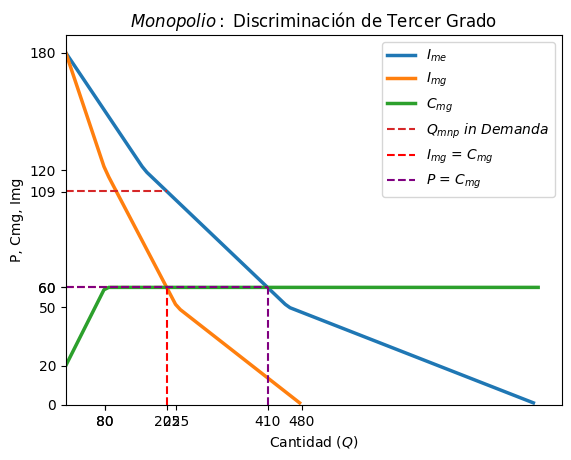

In [84]:
# Define the range of values for Q
Q_values = np.linspace(0, int(p_q_puntos_interseccion[-1]), 100)
rango_cmg_img = np.linspace(0, int(img_equal_cmg_and_Qtotal[1]), 100)
rango_p_cmg = np.linspace(0, int(P_equal_cmg_and_Qtotal[1]), 100)

# Evaluate the piecewise functions for demand and costs
p_q_values = [funcion_demanda_p_q_por_tramos.subs(Q, q) for q in Q_values]
img_values = [funcion_img_q_por_tramos.subs(Q, q) for q in Q_values]
cmg_values = [funcion_costos_por_tramos.subs(Q, q) for q in Q_values]
img_equal_cmg = np.full_like(rango_cmg_img, img_equal_cmg_and_Qtotal[0])
p_equal_cmg = np.full_like(rango_p_cmg, P_equal_cmg_and_Qtotal[0])

cantidad_img_cmg_in_demanda = funcion_demanda_p_q_por_tramos.subs(Q, img_equal_cmg_and_Qtotal[1])
img_equal_cmg_in_demanda = np.full_like(rango_cmg_img, cantidad_img_cmg_in_demanda)

# Plot the demand and costs functions
plt.plot(Q_values, p_q_values, label='$I_{me}$', linewidth=2.5)
plt.plot(Q_values, img_values, label='$I_{mg}$', linewidth=2.5)
plt.plot(Q_values, cmg_values, label='$C_{mg}$', linewidth=2.5)
plt.plot(rango_cmg_img, img_equal_cmg_in_demanda, label = '$Q_{mnp}$ $in$ $Demanda$', linewidth=1.5, linestyle='--')
plt.plot(rango_cmg_img, img_equal_cmg, label='$I_{mg}$ = $C_{mg}$',color='r', linewidth=1.5, linestyle='--')
plt.plot([int(img_equal_cmg_and_Qtotal[1]), int(img_equal_cmg_and_Qtotal[1])], [0, int(img_equal_cmg_and_Qtotal[0])], color='r', linestyle='--')
plt.plot(rango_p_cmg, p_equal_cmg, label='$P$ = $C_{mg}$',color='purple', linewidth=1.5, linestyle='--')
plt.plot([int(P_equal_cmg_and_Qtotal[1]), int(P_equal_cmg_and_Qtotal[1])], [0, int(P_equal_cmg_and_Qtotal[0])], color='purple', linestyle='--')

# Establecer marcas de Img=Cmg y la cantidad que los representa
valores_de_q_total = [int(i) for i in Img_puntos_interseccion] + [int(i) for i in costos_puntos_interseccion]
valores_cmg_img_total = [cmg_q.subs(q_key[1], 0) for cmg_q, q_key in zip(costos_cmg_q.values(), costos_ct_q_key)] + [img_q.subs(q_key[0], 0) for img_q, q_key in zip(demandas_img_q.values(), demandas_q_p_key)]
plt.xticks((int(img_equal_cmg_and_Qtotal[1]), int(P_equal_cmg_and_Qtotal[1]), *[i for i in valores_de_q_total if i != 0]))
plt.yticks((0, int(img_equal_cmg_and_Qtotal[0]), int(cantidad_img_cmg_in_demanda), *[int(i) for i in valores_cmg_img_total if i != 0]))

# Ajustar límites de los ejes
plt.xlim(left=0)
plt.ylim(bottom=0)

# Add labels and legend
plt.xlabel('Cantidad ($Q$)')
plt.ylabel('P, Cmg, Img')
plt.legend()
plt.title('$Monopolio:$ Discriminación de Tercer Grado')
# Show the plot
plt.show()
